In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.roach.heterodyne

In [3]:
import kid_readout.utils.sweeps

In [4]:
ri = kid_readout.roach.heterodyne.RoachHeterodyne()

In [158]:
ri.set_lo(1210)

In [6]:
f0s = np.load('/data/readout/resonances/2015-11-03-starcryo-nevins-initial-resonances-160mK.npy')

In [20]:
f0s

array([ 1220.   ,  1222.687,  1226.25 ,  1233.25 ,  1235.937,  1242.   ,
        1249.812,  1251.062,  1261.812,  1272.187,  1273.375,  1284.812,
        1286.562,  1287.937,  1296.75 ,  1299.562,  1301.937,  1305.187,
        1358.437,  1378.125,  1367.875,  1366.812,  1383.125,  1388.312,
        1393.75 ,  1399.312,  1415.312,  1417.437,  1421.375,  1435.937,
        1456.125,  1464.   ])

In [160]:
f0s-1210

array([  10.   ,   12.687,   16.25 ,   23.25 ,   25.937,   32.   ,
         39.812,   41.062,   51.812,   62.187,   63.375,   74.812,
         76.562,   77.937,   86.75 ,   89.562,   91.937,   95.187,
        148.437,  168.125,  157.875,  156.812,  173.125,  178.312,
        183.75 ,  189.312,  205.312,  207.437,  211.375,  225.937,
        246.125,  254.   ])

In [11]:
-16*512./2**15

-0.25

In [161]:
frq = kid_readout.utils.sweeps.prepare_sweep(ri,f0s,offsets=np.arange(-64,64)*512.0/2**15,nsamp=2**15)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



In [162]:
swp = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 0.8 1.6 2.3 3.1 3.9 4.7 5.5 6.2 7.0 7.8 8.6 9.4 10.2 10.9 11.7 12.5 13.3 14.1 14.8 15.6 16.4 17.2 18.0 18.8 19.5 detected mcnt overflow None 831833 0 65536 0 576 831833
20.3 21.1 21.9 22.7 23.4 24.2 25.0 25.8 26.6 27.3 28.1 28.9 29.7 30.5 31.2 32.0 32.8 33.6 34.4 35.2 35.9 36.7 37.5 38.3 39.1 39.8 40.6 41.4 42.2 43.0 43.8 44.5 detected mcnt overflow None 45409 0 65536 0 64 45409
45.3 46.1 46.9 47.7 48.4 49.2 50.0 50.8 51.6 52.3 53.1 53.9 54.7 55.5 56.2 57.0 57.8 58.6 59.4 60.2 60.9 61.7 62.5 63.3 64.1 64.8 65.6 66.4 67.2 68.0 68.8 69.5 70.3 71.1 71.9 72.7 73.4 74.2 75.0 75.8 76.6 77.3 78.1 78.9 79.7 80.5 81.2 82.0 82.8 83.6 84.4 85.2 85.9 86.7 87.5 88.3 89.1 89.8 90.6 91.4 92.2 93.0 93.8 detected mcnt overflow None 913777 0 65536 0 896 913777
94.5 95.3 96.1 96.9 97.7 98.4 99.2


In [52]:
import kid_readout.utils.acquire

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [167]:
from kid_readout.analysis.khalil import delayed_generic_guess,delayed_generic_s21
import kid_readout.analysis.resonator

In [163]:
fits = kid_readout.utils.acquire.fit_sweep_data(swp,delay_estimate=-31.3,model=delayed_generic_s21, guess=delayed_generic_guess)

In [166]:
np.unique(swp.sweep_indexes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [175]:
def fit_sweep_data(sweep):
    fits = []
    for k in range(32):
        f,s21,errors = sweep.select_index(k)
        s21 = s21*np.exp(-2j*np.pi*31.3*f)
        fits.append(kid_readout.analysis.resonator.fit_resonator(f,s21,errors=errors,min_a=1,delay_estimate=0)[0])
    return fits

In [176]:
fits = fit_sweep_data(swp)

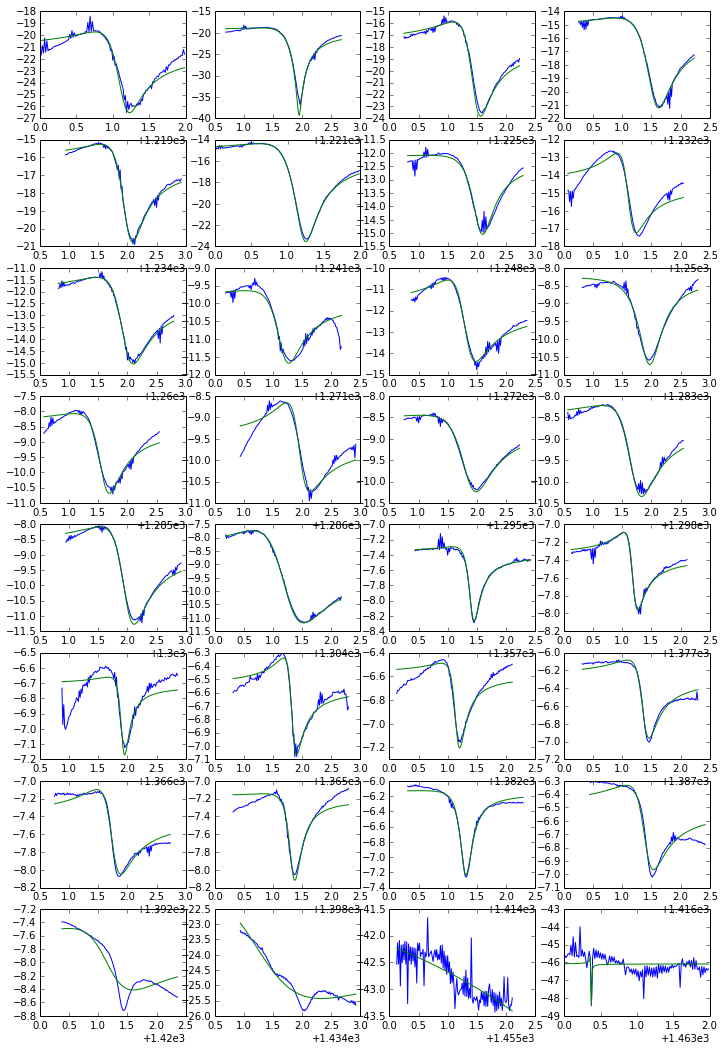

In [177]:
fig,axs=subplots(8,4,figsize=(12,18))
for k in range(32):
    ax = axs.flatten()[k]
    fr,s21,err = swp.select_index(k)
    fit = fits[k]
    ax.plot(fr,20*np.log10(np.abs(s21)))
    ax.plot(fit.freq_data,20*np.log10(np.abs(fit.model())))

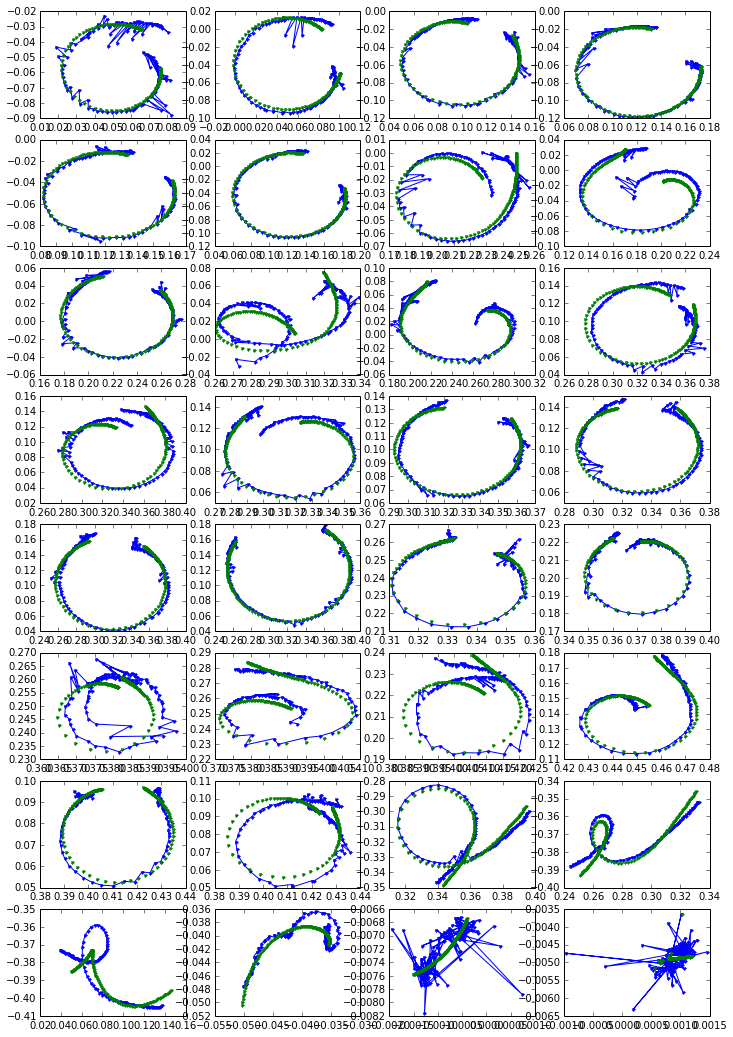

In [178]:
fig,axs=subplots(8,4,figsize=(12,18))
for k in range(32):
    ax = axs.flatten()[k]
    fr,s21,err = swp.select_index(k)
    s21c = s21*np.exp(-2j*np.pi*fr*31.3)
    #s21c = s21c - s21c.mean()
    ax.plot(s21c.real,s21c.imag,'.-')
    fit = fits[k]
    ax.plot(fit.model().real,fit.model().imag,'.')
    #ax.set_xlim(-0.05,0.05)
    #ax.set_ylim(-0.05,0.05)

In [151]:
swp2 = kid_readout.utils.sweeps.do_prepared_sweep(ri,nchan_per_step=32)

0.0 0.8 1.6 2.3 3.1 3.9 4.7 5.5 6.2 7.0 7.8 8.6 9.4 10.2 10.9 11.7 12.5 13.3 14.1 14.8 15.6 16.4 17.2 18.0 18.8 19.5 20.3 21.1 21.9 22.7 23.4 24.2 25.0 25.8 26.6 27.3 28.1 28.9 29.7 30.5 31.2 32.0 32.8 33.6 34.4 35.2 35.9 36.7 37.5 38.3 39.1 39.8 40.6 41.4 42.2 43.0 43.8 44.5 45.3 46.1 46.9 47.7 48.4 49.2 50.0 50.8 51.6 52.3 53.1 53.9 54.7 55.5 56.2 57.0 57.8 58.6 59.4 60.2 60.9 61.7 62.5 63.3 64.1 64.8 65.6 66.4 67.2 68.0 68.8 69.5 detected mcnt overflow None 49148 0 65536 0 496 49148
70.3 71.1 71.9 72.7 73.4 74.2 75.0 75.8 76.6 77.3 78.1 78.9 79.7 80.5 81.2 82.0 82.8 83.6 84.4 85.2 85.9 86.7 87.5 88.3 89.1 89.8 90.6 91.4 92.2 93.0 93.8 94.5 95.3 96.1 96.9 97.7 98.4 99.2


In [152]:
fits2 = kid_readout.utils.acquire.fit_sweep_data(swp2,delay_estimate=31.3,model=delayed_generic_s21, guess=delayed_generic_guess)

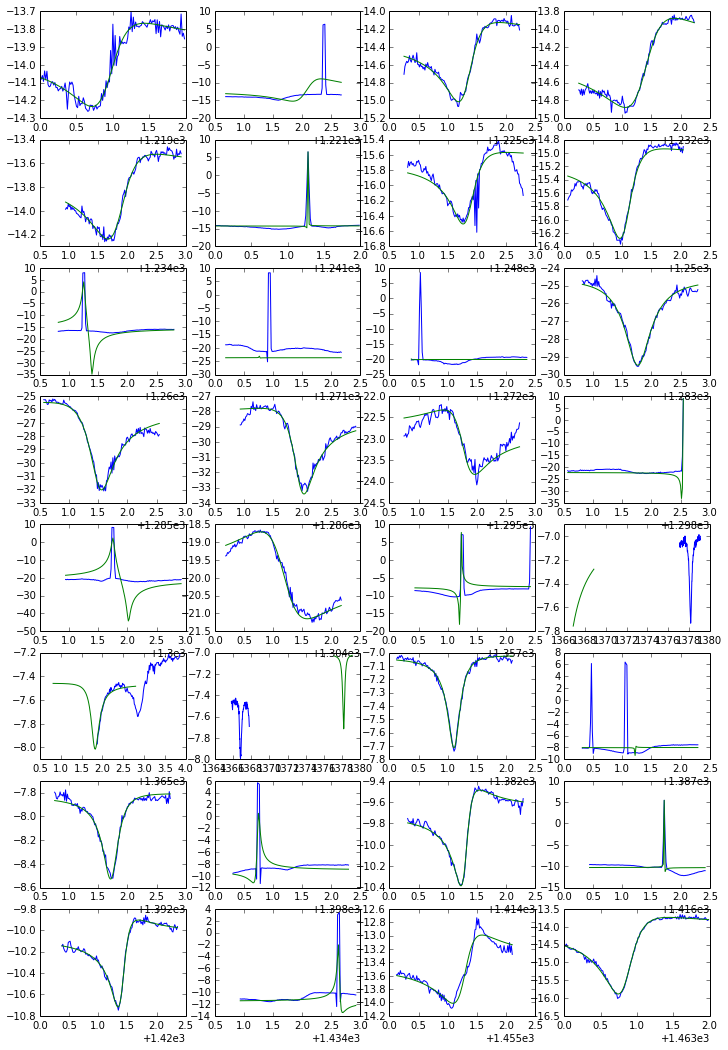

In [153]:
fig,axs=subplots(8,4,figsize=(12,18))
for k in range(32):
    ax = axs.flatten()[k]
    fr,s21,err = swp2.select_index(k)
    fit = fits2[k]
    ax.plot(fr,20*np.log10(np.abs(s21)))
    ax.plot(fit.freq_data,20*np.log10(np.abs(fit.model())))

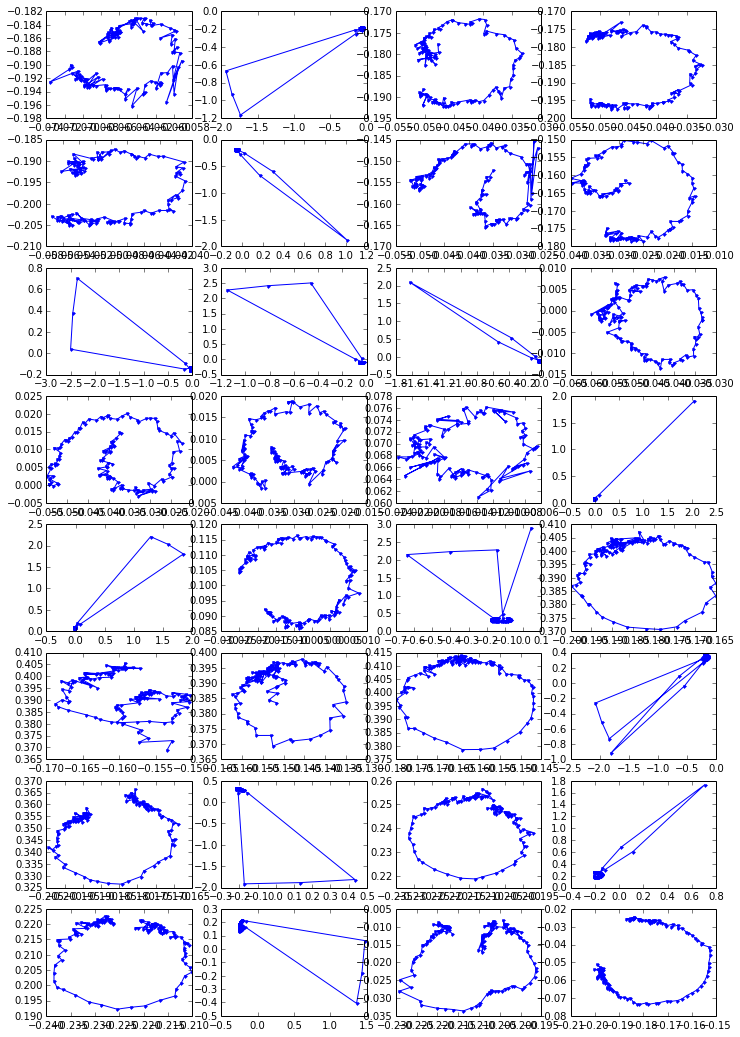

In [156]:
fig,axs=subplots(8,4,figsize=(12,18))
for k in range(32):
    ax = axs.flatten()[k]
    fr,s21,err = swp2.select_index(k)
    s21c = s21*np.exp(-2j*np.pi*fr*31.3)
    #s21c = s21c - s21c.mean()
    ax.plot(s21c.real,s21c.imag,'.-')
    fit = fits2[k]
    #ax.plot(fit.model().real,fit.model().imag,'.')
    #ax.set_xlim(-0.05,0.05)
    #ax.set_ylim(-0.05,0.05)

In [64]:
(np.array([fit.f_0 for fit in fits])-f0s)*1000

array([    33.25613823,     99.77856784,     89.33356573,    156.95131904,
          -69.90171367,     65.06108889,    201.84588207,    -23.26786854,
           80.67333623,   1024.90474514,   1781.24999376,    112.81267369,
          -42.48586865,    -59.20852624,     56.65304254,     75.16037005,
          -30.46789124,    -92.24491507,    -28.03963627, -11301.87783074,
           73.59855293,  11353.30562512,     27.93231814,     47.94626502,
          -20.45623774,     32.24299245,    -23.40692867,    -43.80998346,
         -341.45521584,   1401.02189762,   2968.72741863,   -190.15223947])

(0, 20000)

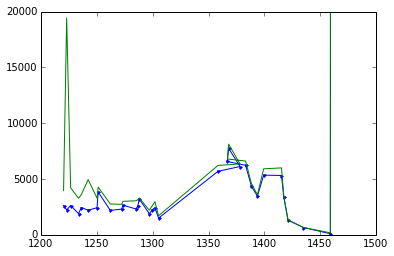

In [180]:
plot(np.array([fit.f_0 for fit in fits]),np.array([fit.Q for fit in fits]),'.-')
#plot(np.array([fit.f_0 for fit in fits2]),np.array([fit.Q_i for fit in fits2]))
plot(np.array([fit.f_0 for fit in fits]),np.abs(np.array([fit.Q_i for fit in fits])))
ylim(0,20000)

In [184]:
np.array([fit.f_0 for fit in fits])

array([ 1220.04347678,  1222.81650152,  1226.36536252,  1233.43191911,
        1235.92221371,  1242.08818214,  1250.02595657,  1251.06692524,
        1261.9105121 ,  1272.14901898,  1273.26027493,  1284.93545124,
        1286.5619706 ,  1287.93281205,  1296.8445836 ,  1299.67302304,
        1301.94618705,  1305.14887906,  1358.41300463,  1378.1854328 ,
        1367.92183406,  1366.83356566,  1383.1597387 ,  1388.36820787,
        1393.73787675,  1399.34294046,  1415.29097891,  1417.40222308,
        1421.15650457,  1435.00287107,  1459.09293694,  1463.37217024])

In [185]:
ri.set_tone_freqs(np.array(sorted(np.array([fit.f_0 for fit in fits]))),nsamp=2**17)

bank_offset= 0 start_offset= 0 start_offset_bytes= 0
writing DRAM bank 0



array([ 1220.04296875,  1222.81640625,  1226.3671875 ,  1233.43359375,
        1235.921875  ,  1242.08984375,  1250.02734375,  1251.06640625,
        1261.91015625,  1272.1484375 ,  1273.26171875,  1284.93359375,
        1286.5625    ,  1287.93359375,  1296.84375   ,  1299.671875  ,
        1301.9453125 ,  1305.1484375 ,  1358.4140625 ,  1366.83203125,
        1367.921875  ,  1378.18359375,  1383.16015625,  1388.3671875 ,
        1393.73828125,  1399.34375   ,  1415.2890625 ,  1417.40234375,
        1421.15625   ,  1435.00390625,  1459.09375   ,  1463.37109375])

In [186]:
ri.select_fft_bins(range(32))

In [74]:
ri.set_dac_atten(0)

In [187]:
ri.set_modulation_output(7)

122.0703125

In [ ]:
import kid_readout.equipment.hittite_controller

In [102]:
d,addr = ri.get_data(64)

In [68]:
d.shape

(262144, 32)

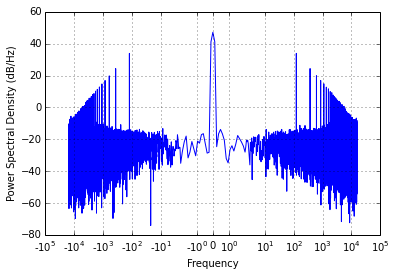

In [103]:
blah = psd(d[:,1],Fs=512e6/2**14,NFFT=2**18)
xscale('symlog')

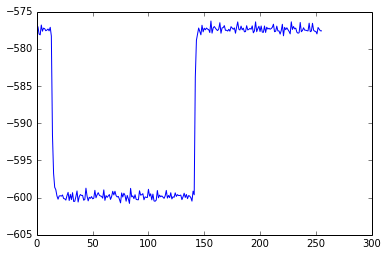

In [104]:
plot(d[:,17].real.reshape((-1,256)).mean(0))

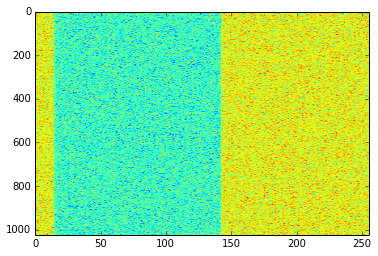

In [105]:
imshow(d[:,17].real.reshape((-1,256)),aspect='auto')

In [106]:
dm = d.reshape((-1,256,32)).mean(0)
dm = dm - dm.mean(0)

In [107]:
dm.shape

(256, 32)

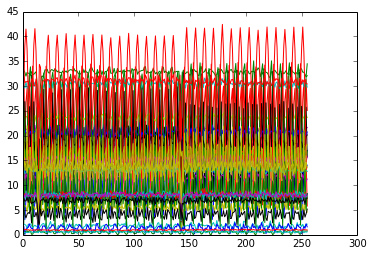

In [112]:
plot(np.abs(dm))